# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science). 

## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/wine.csv')
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
89,12.08,1.33,2.30,23.6,70,2.20,1.59,0.42,1.38,1.74,1.07,3.21,625,1
150,13.50,3.12,2.62,24.0,123,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500,2
164,13.78,2.76,2.30,22.0,90,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615,2
46,14.38,3.59,2.28,16.0,102,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065,0
58,13.72,1.43,2.50,16.7,108,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285,0
48,14.10,2.02,2.40,18.8,103,2.75,2.92,0.32,2.38,6.20,1.07,2.75,1060,0
49,13.94,1.73,2.27,17.4,108,2.88,3.54,0.32,2.08,8.90,1.12,3.10,1260,0
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520,1
25,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830,0
159,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620,2


Your challenge is to explore the data and train a classification model that achieves an overall *Recall* metric of over 0.95 (95%).

> **Note**: There is no single "correct" solution. A sample solution is provided in [03 - Wine Classification Solution.ipynb](03%20-%20Wine%20Classification%20Solution.ipynb).

## Train and evaluate a model

Add markdown and code cells as required to to explore the data, train a model, and evaluate the model's predictive performance.

In [ ]:
# Your code to evaluate data, and train and evaluate a classification modelb

In [3]:
# Count the number of null values for each column
data.isnull().sum()

Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64

In [39]:
data.iloc[:,:-1]

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [55]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X, y = data.iloc[:,:-1].values, data['WineVariety'].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0,stratify=data['WineVariety'])

print ('Training Set: %s, Test Set: %s \n' % (X_train.shape, X_test.shape))

Training Set: (133, 13), Test Set: (45, 13) 



In [56]:
from sklearn.ensemble import RandomForestClassifier


multi_model1 = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
print(multi_model1)

RandomForestClassifier()


In [57]:
y_prediction = multi_model1.predict(X_test)
y_prediction

array([2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 0, 2,
       2, 2, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1,
       1])

In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_test, y_prediction))
print("Overall Precision:",precision_score(y_test, y_prediction, average='macro'))
print("Overall Recall:",recall_score(y_test, y_prediction, average='macro'))

Overall Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0


In [60]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, y_prediction)
print(cm)

[[15  0  0]
 [ 0 18  0]
 [ 0  0 12]]


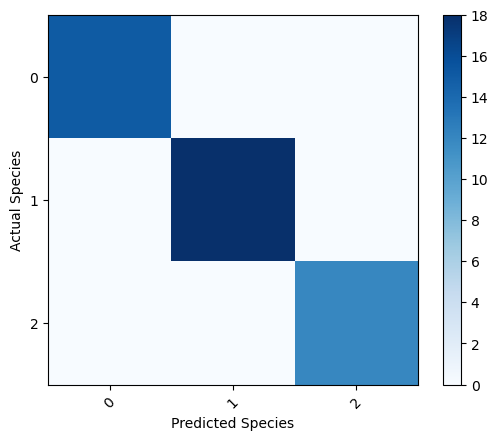

In [61]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(data['WineVariety'].unique()))
plt.xticks(tick_marks, data['WineVariety'].unique(), rotation=45)
plt.yticks(tick_marks, data['WineVariety'].unique())
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [62]:
data['WineVariety'].unique().tolist()

[0, 1, 2]

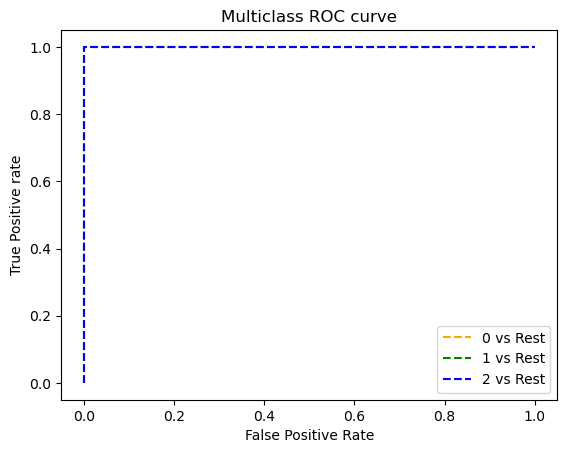

In [63]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Get class probability scores
prob = multi_model1.predict_proba(X_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(data['WineVariety'].unique())):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=str(data['WineVariety'].unique().tolist()[0]) + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=str(data['WineVariety'].unique().tolist()[1]) + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=str(data['WineVariety'].unique().tolist()[2]) + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [64]:
auc = roc_auc_score(y_test,prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 1.0


In [65]:
data

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


## Use the model with new data observation

When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


In [66]:
import joblib

# Save the model as a pickle file
filename = '../models/wine_model.pkl'
joblib.dump(multi_model1, filename)

['../models/wine_model.pkl']

In [67]:
# Load the model from the file
multi_model = joblib.load(filename)

In [68]:
# This time our input is an array of two feature arrays
x_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
         [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])
print ('New samples:\n{}'.format(x_new))

New samples:
[[1.372e+01 1.430e+00 2.500e+00 1.670e+01 1.080e+02 3.400e+00 3.670e+00
  1.900e-01 2.040e+00 6.800e+00 8.900e-01 2.870e+00 1.285e+03]
 [1.237e+01 9.400e-01 1.360e+00 1.060e+01 8.800e+01 1.980e+00 5.700e-01
  2.800e-01 4.200e-01 1.950e+00 1.050e+00 1.820e+00 5.200e+02]]


In [70]:

# Call the web service, passing the input data
predictions = multi_model.predict(x_new)
predictions

array([0, 1])